In [1]:
import os
import pandas as pd
import matplotlib.pyplot as plt

#create a list of files in your path
path = '/Users/glynismattheisen/Desktop/names/'
file_list = os.listdir(path)
file_list

['yob2000.txt',
 'yob2014.txt',
 'yob1938.txt',
 'yob1910.txt',
 'yob1904.txt',
 'Week 1 Solutions Part 1.ipynb',
 'yob1905.txt',
 'yob1911.txt',
 'yob1939.txt',
 'yob2015.txt',
 'yob2001.txt',
 'yob2017.txt',
 'yob2003.txt',
 'yob1907.txt',
 'yob1913.txt',
 'yob1898.txt',
 'Week 1 Solutions Part 3.ipynb',
 'yob1899.txt',
 'yob1912.txt',
 'yob1906.txt',
 'yob2002.txt',
 'yob2016.txt',
 'yob2012.txt',
 'yob2006.txt',
 'yob1902.txt',
 'yob1916.txt',
 'yob1889.txt',
 '.DS_Store',
 'yob1888.txt',
 'yob1917.txt',
 'yob1903.txt',
 'yob2007.txt',
 'yob2013.txt',
 'yob2005.txt',
 'yob2011.txt',
 'yob1915.txt',
 'yob1901.txt',
 'yob1929.txt',
 'yob1928.txt',
 'yob1900.txt',
 'yob1914.txt',
 'yob2010.txt',
 'yob2004.txt',
 'yob1973.txt',
 'yob1967.txt',
 'yob1998.txt',
 'initial_statistics.csv',
 'yob1999.txt',
 'yob1966.txt',
 'yob1972.txt',
 'Week 1 Solutions Part 2.ipynb',
 'yob1958.txt',
 'yob1964.txt',
 'yob1970.txt',
 'yob1971.txt',
 'yob1965.txt',
 'yob1959.txt',
 'yob1961.txt',
 'yob1975

In [2]:
# remove unwanted files
file_list.remove('.DS_Store')
file_list.remove('.ipynb_checkpoints')
file_list.remove('Day 2- Assignment.ipynb')
file_list.remove('Week 1 Solutions Part 2.ipynb')
file_list.remove('Week 1 Solutions Part 3.ipynb')
file_list.remove('Week 1 Solutions Part 3-PPN.ipynb')
'initial_statistics.csv'
'Week 1 Solutions Part 1.ipynb'
'Graphing with Pandas.ipynb'



ValueError: list.remove(x): x not in list

In [3]:
#confirm all files deleted
file_list

['yob2000.txt',
 'yob2014.txt',
 'yob1938.txt',
 'yob1910.txt',
 'yob1904.txt',
 'yob1905.txt',
 'yob1911.txt',
 'yob1939.txt',
 'yob2015.txt',
 'yob2001.txt',
 'yob2017.txt',
 'yob2003.txt',
 'yob1907.txt',
 'yob1913.txt',
 'yob1898.txt',
 'yob1899.txt',
 'yob1912.txt',
 'yob1906.txt',
 'yob2002.txt',
 'yob2016.txt',
 'yob2012.txt',
 'yob2006.txt',
 'yob1902.txt',
 'yob1916.txt',
 'yob1889.txt',
 'yob1888.txt',
 'yob1917.txt',
 'yob1903.txt',
 'yob2007.txt',
 'yob2013.txt',
 'yob2005.txt',
 'yob2011.txt',
 'yob1915.txt',
 'yob1901.txt',
 'yob1929.txt',
 'yob1928.txt',
 'yob1900.txt',
 'yob1914.txt',
 'yob2010.txt',
 'yob2004.txt',
 'yob1973.txt',
 'yob1967.txt',
 'yob1998.txt',
 'yob1999.txt',
 'yob1966.txt',
 'yob1972.txt',
 'yob1958.txt',
 'yob1964.txt',
 'yob1970.txt',
 'yob1971.txt',
 'yob1965.txt',
 'yob1959.txt',
 'yob1961.txt',
 'yob1975.txt',
 'yob1949.txt',
 'yob1948.txt',
 'yob1974.txt',
 'yob1960.txt',
 'yob1976.txt',
 'yob1962.txt',
 'yob1989.txt',
 'yob1988.txt',
 'yob196

In [4]:
#create empty list
data_list = []

#cycle through importing all files from file_list and giving appropriate column names
for fi in file_list:
    full_path = path + fi
    
    #load file
    data_df = pd.read_csv(full_path, names = ['name','gender', 'count'])
    #index_col = 0 says take the first column and use it as an index column
    #set index to 'names' column
    #data_df.set_index('name',inplace=True)
    #add a file_name column to data_df
    data_df["file_name"] = fi
    
    #add file into list
    data_list.append(data_df)
    
#show the contents of data_list
data_list

[            name gender  count    file_name
 0          Emily      F  25953  yob2000.txt
 1         Hannah      F  23080  yob2000.txt
 2        Madison      F  19967  yob2000.txt
 3         Ashley      F  17997  yob2000.txt
 4          Sarah      F  17697  yob2000.txt
 5         Alexis      F  17629  yob2000.txt
 6       Samantha      F  17266  yob2000.txt
 7        Jessica      F  15709  yob2000.txt
 8      Elizabeth      F  15094  yob2000.txt
 9         Taylor      F  15078  yob2000.txt
 10        Lauren      F  14175  yob2000.txt
 11        Alyssa      F  13553  yob2000.txt
 12         Kayla      F  13312  yob2000.txt
 13       Abigail      F  13088  yob2000.txt
 14       Brianna      F  12878  yob2000.txt
 15        Olivia      F  12852  yob2000.txt
 16          Emma      F  12548  yob2000.txt
 17         Megan      F  11434  yob2000.txt
 18         Grace      F  11284  yob2000.txt
 19      Victoria      F  10923  yob2000.txt
 20        Rachel      F  10673  yob2000.txt
 21       

In [5]:
#combine in a data frame
df = pd.concat(data_list)
df

,name,gender,count,file_name
0,Emily,F,25953,yob2000.txt
1,Hannah,F,23080,yob2000.txt
2,Madison,F,19967,yob2000.txt
3,Ashley,F,17997,yob2000.txt
4,Sarah,F,17697,yob2000.txt
5,Alexis,F,17629,yob2000.txt
6,Samantha,F,17266,yob2000.txt
7,Jessica,F,15709,yob2000.txt
8,Elizabeth,F,15094,yob2000.txt
9,Taylor,F,15078,yob2000.txt


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1924665 entries, 0 to 9036
Data columns (total 4 columns):
name         object
gender       object
count        int64
file_name    object
dtypes: int64(1), object(3)
memory usage: 73.4+ MB


In [102]:
#create a column with the years extrace from file names
def get_year (s):
    #slice out the portion of file name contianing the year and convert from string to integer
    return int(s[3:7])

#apply function
df['year'] = df['file_name'].apply(get_year)
df

,name,gender,count,file_name,year
0,Emily,F,25953,yob2000.txt,2000
1,Hannah,F,23080,yob2000.txt,2000
2,Madison,F,19967,yob2000.txt,2000
3,Ashley,F,17997,yob2000.txt,2000
4,Sarah,F,17697,yob2000.txt,2000
5,Alexis,F,17629,yob2000.txt,2000
6,Samantha,F,17266,yob2000.txt,2000
7,Jessica,F,15709,yob2000.txt,2000
8,Elizabeth,F,15094,yob2000.txt,2000
9,Taylor,F,15078,yob2000.txt,2000


In [8]:
#group by name and year
grouped_df=df.groupby(['name','year']).sum()
grouped_df

count
name      year       
Aaban     2007      5
          2009      6
          2010      9
          2011     11
          2012     11
          2013     14
          2014     16
          2015     15
          2016      9
          2017     11
Aabha     2011      7
          2012      5
          2014      9
          2015      7
          2016      7
Aabid     2003      5
          2016      5
Aabir     2016      5
Aabriella 2008      5
          2014      5
          2015      5
          2016     11
          2017      6
Aada      2015      5
Aadam     1987      5
          1988      5
          1993      7
          1994      6
          1995      6
          1996      5
...               ...
Zyshawn   2013     13
          2014      6
Zyshon    1998      8
          2001      6
          2005      5
Zyshonne  1998     26
          1999     30
          2000     17
          2001     12
          2002      9
          2003      7
Zytaevius 2012      5
Zytaveon  2011      8
          2014      8
Zytavion  2011      5
Zytavious 2002      6
          2004      6
          2005      5
          2006      7
          2007      6
          2009      7
          2010      6
Zyus      2015      5
Zyva      2016      8
          2017      9
Zyvion    2009      5
Zyvon     2015      7
Zyyanna   2010      6
Zyyon     2014      6
Zzyzx     2010      5

[1756284 rows x 1 columns]

Goal 3: Create plots with pandas
    
* medium: plot a time series with one name over all years

Text(0,0.5,'count')

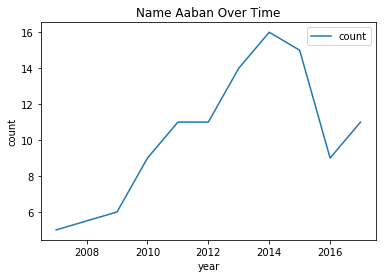

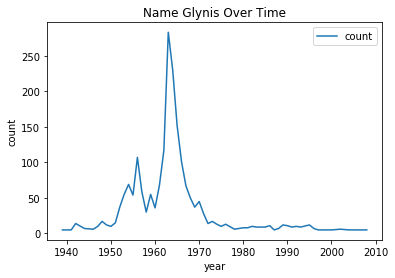

In [9]:
#graph name use over time for Aaban
grouped_df.loc['Aaban'].plot.line(x=None, y='count')
plt.title('Name Aaban Over Time')
plt.ylabel('count')
#graph name use over time for Glynis
grouped_df.loc['Glynis'].plot.line(x=None, y='count')
plt.title('Name Glynis Over Time')
plt.xlabel('year')
plt.ylabel('count')

In [10]:
#shape of df
df.shape

(1924665, 5)

In [11]:
#create two new dataframes splitting df between boys and girls
girls_df = df[df.gender == 'F']
boys_df = df[df.gender == 'M']

In [12]:
#reset index to further extract out names
boys_df.reset_index(inplace=True)

In [13]:
#reset index to further extract out names
girls_df.reset_index(inplace=True)

In [14]:
boys_df

,index,name,gender,count,file_name,year
0,17653,Jacob,M,34471,yob2000.txt,2000
1,17654,Michael,M,32035,yob2000.txt,2000
2,17655,Matthew,M,28572,yob2000.txt,2000
3,17656,Joshua,M,27538,yob2000.txt,2000
4,17657,Christopher,M,24931,yob2000.txt,2000
5,17658,Nicholas,M,24652,yob2000.txt,2000
6,17659,Andrew,M,23639,yob2000.txt,2000
7,17660,Joseph,M,22825,yob2000.txt,2000
8,17661,Daniel,M,22312,yob2000.txt,2000
9,17662,Tyler,M,21503,yob2000.txt,2000


In [15]:
#confirm that all data is still there: boys_df.shape + girls_df.shape = df.shape
print(girls_df.shape)
print(boys_df.shape)

(1138293, 6)
(786372, 6)


In [16]:
Nick_df = boys_df[boys_df.name == 'Nicholas']

In [17]:
Philip_df = boys_df[boys_df.name == 'Philip']

In [18]:
Paulina_df = girls_df[girls_df.name == 'Paulina']

In [19]:
#create empty list for unique boy names
boys_unique = []

for i in range (1880,2018):
        #mask for each year in sequence
        mask = boys_df['year'] == i
        #create a new list containing just values from mask = True
        unique_1 = boys_df[mask]
        #determine unique vales within the new list
        unique_1 = unique_1['name'].unique()
        #calculate length of unique list to get # of unique names
        data_1 = [len(unique_1), i]
        #append to boys_unique list
        boys_unique.append(data_1)
        #print to confirm proper calculation being made
        print(data_1)
        #increase value to perform function of next year
        i += 1

[1058, 1880]
[997, 1881]
[1099, 1882]
[1030, 1883]
[1125, 1884]
[1097, 1885]
[1110, 1886]
[1067, 1887]
[1177, 1888]
[1111, 1889]
[1161, 1890]
[1127, 1891]
[1260, 1892]
[1179, 1893]
[1239, 1894]
[1241, 1895]
[1266, 1896]
[1229, 1897]
[1289, 1898]
[1200, 1899]
[1506, 1900]
[1210, 1901]
[1320, 1902]
[1306, 1903]
[1395, 1904]
[1421, 1905]
[1413, 1906]
[1549, 1907]
[1584, 1908]
[1679, 1909]
[1839, 1910]
[1999, 1911]
[2906, 1912]
[3261, 1913]
[3759, 1914]
[4390, 1915]
[4534, 1916]
[4602, 1917]
[4813, 1918]
[4810, 1919]
[4990, 1920]
[4986, 1921]
[4967, 1922]
[4904, 1923]
[4970, 1924]
[4867, 1925]
[4837, 1926]
[4803, 1927]
[4724, 1928]
[4543, 1929]
[4541, 1930]
[4320, 1931]
[4284, 1932]
[4154, 1933]
[4207, 1934]
[4145, 1935]
[4037, 1936]
[4019, 1937]
[4036, 1938]
[3967, 1939]
[3936, 1940]
[4000, 1941]
[4045, 1942]
[4040, 1943]
[3909, 1944]
[3783, 1945]
[4019, 1946]
[4268, 1947]
[4199, 1948]
[4203, 1949]
[4191, 1950]
[4251, 1951]
[4257, 1952]
[4339, 1953]
[4352, 1954]
[4388, 1955]
[4450, 1956]


In [20]:
#as above except girls this time
girls_unique = []

for i in range (1880,2018):
        mask = girls_df['year'] == i
        unique_1 = girls_df[mask]
        unique_1 = unique_1['name'].unique()
        data_1 = [len(unique_1), i]
        girls_unique.append(data_1)
        print(data_1)
        i += 1

[942, 1880]
[938, 1881]
[1028, 1882]
[1054, 1883]
[1172, 1884]
[1197, 1885]
[1282, 1886]
[1306, 1887]
[1474, 1888]
[1479, 1889]
[1534, 1890]
[1533, 1891]
[1661, 1892]
[1652, 1893]
[1702, 1894]
[1808, 1895]
[1825, 1896]
[1799, 1897]
[1975, 1898]
[1842, 1899]
[2224, 1900]
[1943, 1901]
[2042, 1902]
[2083, 1903]
[2165, 1904]
[2234, 1905]
[2220, 1906]
[2399, 1907]
[2434, 1908]
[2548, 1909]
[2790, 1910]
[2868, 1911]
[3445, 1912]
[3707, 1913]
[4206, 1914]
[4967, 1915]
[5162, 1916]
[5312, 1917]
[5586, 1918]
[5559, 1919]
[5765, 1920]
[5871, 1921]
[5789, 1922]
[5739, 1923]
[5899, 1924]
[5771, 1925]
[5621, 1926]
[5603, 1927]
[5436, 1928]
[5275, 1929]
[5248, 1930]
[4977, 1931]
[5100, 1932]
[4858, 1933]
[4973, 1934]
[4892, 1935]
[4856, 1936]
[4927, 1937]
[4994, 1938]
[4952, 1939]
[5025, 1940]
[5085, 1941]
[5380, 1942]
[5368, 1943]
[5245, 1944]
[5241, 1945]
[5686, 1946]
[6103, 1947]
[6040, 1948]
[6065, 1949]
[6111, 1950]
[6211, 1951]
[6391, 1952]
[6499, 1953]
[6616, 1954]
[6725, 1955]
[6885, 1956]
[

In [21]:
#convert to dataframe
boys_unique_df = pd.DataFrame(boys_unique, columns=['# unique names','year']) 
boys_unique_df

,# unique names,year
0,1058,1880
1,997,1881
2,1099,1882
3,1030,1883
4,1125,1884
5,1097,1885
6,1110,1886
7,1067,1887
8,1177,1888
9,1111,1889


In [22]:
#convert to dataframe
girls_unique_df = pd.DataFrame(girls_unique, columns=['# unique names','year']) 
girls_unique_df

,# unique names,year
0,942,1880
1,938,1881
2,1028,1882
3,1054,1883
4,1172,1884
5,1197,1885
6,1282,1886
7,1306,1887
8,1474,1888
9,1479,1889


Goal 3: Create plots with pandas
    
* hard: plot the number of distinct boy/girl names over time

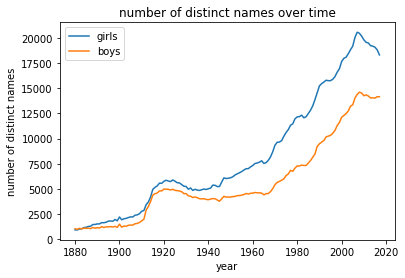

In [23]:
#plot unique boy/girl names over time
import matplotlib.pyplot as plt
plt.plot(girls_unique_df['year'], girls_unique_df['# unique names'],label='girls')
plt.plot(boys_unique_df['year'], boys_unique_df['# unique names'],label='boys')
plt.legend()
plt.title('number of distinct names over time')
plt.ylabel('number of distinct names')
plt.xlabel('year')
plt.show()

In [24]:
#get just the Glynis data
Glynis_df = df[df.name == 'Glynis']

In [25]:
#sort by year
Glynis_df.sort_values(by='year')

,name,gender,count,file_name,year
4507,Glynis,F,5,yob1939.txt,1939
4660,Glynis,F,5,yob1941.txt,1941
2466,Glynis,F,14,yob1942.txt,1942
3841,Glynis,F,7,yob1944.txt,1944
4638,Glynis,F,6,yob1946.txt,1946
3543,Glynis,F,10,yob1947.txt,1947
2439,Glynis,F,17,yob1948.txt,1948
3062,Glynis,F,12,yob1949.txt,1949
3516,Glynis,F,10,yob1950.txt,1950
2731,Glynis,F,15,yob1951.txt,1951


In [26]:
#dropping file name column
Glynis_df = Glynis_df.drop('file_name',axis=1)

In [27]:
Glynis_df

,name,gender,count,year
15888,Glynis,F,5,2000
4507,Glynis,F,5,1939
14189,Glynis,F,6,2002
17007,Glynis,F,5,2004
3679,Glynis,F,17,1973
1338,Glynis,F,67,1967
1032,Glynis,F,101,1966
4152,Glynis,F,14,1972
2035,Glynis,F,30,1958
671,Glynis,F,230,1964


In [28]:
# X would be year and y would be # of births

In [29]:
#x list of glynis years
X = Glynis_df[['year']].values
X_N = Nick_df[['year']].values
X_Ph = Philip_df[['year']].values
X_Pa = Paulina_df[['year']].values

In [30]:
# y list of glynis values
y = Glynis_df[['count']].values
y_N = Nick_df[['count']].values
y_Ph = Philip_df[['count']].values
y_Pa = Paulina_df[['count']].values

In [31]:
from sklearn.linear_model import LinearRegression
import numpy as np

In [32]:
#create linear regression model
m = LinearRegression()
m

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [33]:
X.shape, y.shape

((59, 1), (59, 1))

In [34]:
X = np.array(X).reshape(-1,1)

In [35]:
y = np.array(y)

In [36]:
X.shape, y.shape

((59, 1), (59, 1))

In [37]:
#fit the data with linear regression model
m.fit(X,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [38]:
#checking that it works and returns values
m.coef_

array([[-0.71084714]])

In [39]:
ypred = m.predict(X)

### Goal 4: Build a supervised learning model

* easy: build a linear regression model with scikit-learn for one name

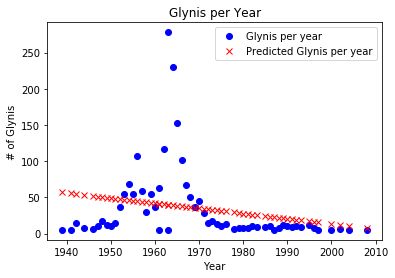

In [40]:
# plot data v prediction from model
plt.plot(X,y,'bo', label='Glynis per year')
plt.plot(X, ypred,'rx', label ='Predicted Glynis per year')
plt.xlabel('Year')
plt.ylabel('# of Glynis')
plt.legend()
plt.title('Glynis per Year')
plt.show()

In [44]:
# conclusion: Glynis heading swiftly toward extinction

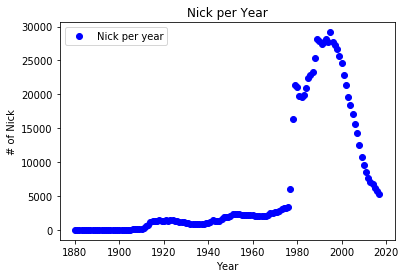

In [41]:
plt.plot(X_N,y_N,'bo', label='Nick per year')
plt.xlabel('Year')
plt.ylabel('# of Nick')
plt.legend()
plt.title('Nick per Year')
plt.show()

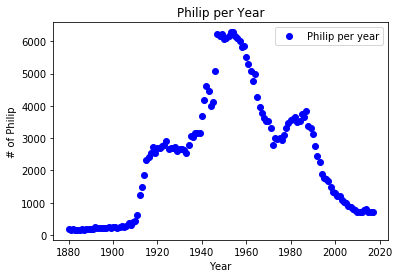

In [42]:
plt.plot(X_Ph,y_Ph,'bo', label='Philip per year')
plt.xlabel('Year')
plt.ylabel('# of Philip')
plt.legend()
plt.title('Philip per Year')
plt.show()

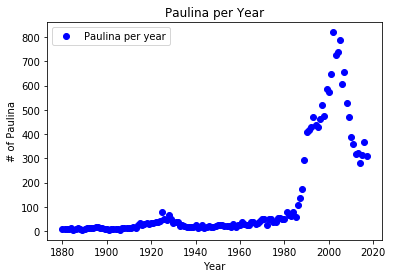

In [43]:
plt.plot(X_Pa,y_Pa,'bo', label='Paulina per year')
plt.xlabel('Year')
plt.ylabel('# of Paulina')
plt.legend()
plt.title('Paulina per Year')
plt.show()

In [45]:
#get total number of births ever (for data set)
df['count'].sum()

348120517

In [46]:
# need to sum total births per year for only the years there were Glynis' and then create a list

#create empty list for total number births per year
births_year = []

for i in Glynis_df['year']:
        #mask for each year in sequence
        mask = df['year'] == i
        #create a new list containing just values from mask = True
        just_year = df[mask]
        #calculate sum of babies for that year and store as data_2
        data_2 = [just_year['count'].sum(), i]
        #append to to births_year
        births_year.append(data_2)
        #print to confirm proper calculation being made
        print(data_2)
        #increase value to perform function of next year
        i += 1

[3778079, 2000]
[2203276, 1939]
[3736042, 2002]
[3818361, 2004]
[3017412, 1973]
[3395130, 1967]
[3475674, 1966]
[3143627, 1972]
[4131657, 1958]
[3887800, 1964]
[3607420, 1970]
[3432585, 1971]
[3626029, 1965]
[4156434, 1959]
[4140244, 1961]
[4140244, 1961]
[3019910, 1975]
[3484531, 1949]
[3452217, 1948]
[3040409, 1974]
[4154377, 1960]
[3034949, 1976]
[4035234, 1962]
[3843559, 1989]
[3693471, 1988]
[3958791, 1963]
[3958791, 1963]
[3799172, 1952]
[3195046, 1946]
[3894329, 1991]
[3568075, 1985]
[3950992, 1990]
[3602032, 1947]
[3852228, 1953]
[3327416, 1979]
[3683862, 1951]
[3555871, 1986]
[3840196, 1992]
[3769282, 1993]
[3604403, 1987]
[3503700, 1950]
[2689817, 1944]
[3174268, 1978]
[3979884, 1954]
[3378876, 1968]
[3462826, 1983]
[3624799, 1997]
[3646362, 1996]
[3507664, 1982]
[3476215, 1969]
[4014041, 1955]
[2436060, 1941]
[4200007, 1957]
[3444537, 1980]
[3459182, 1981]
[3661351, 1995]
[2731457, 1942]
[4121070, 1956]
[3926358, 2008]


In [47]:
births_year

[[3778079, 2000],
 [2203276, 1939],
 [3736042, 2002],
 [3818361, 2004],
 [3017412, 1973],
 [3395130, 1967],
 [3475674, 1966],
 [3143627, 1972],
 [4131657, 1958],
 [3887800, 1964],
 [3607420, 1970],
 [3432585, 1971],
 [3626029, 1965],
 [4156434, 1959],
 [4140244, 1961],
 [4140244, 1961],
 [3019910, 1975],
 [3484531, 1949],
 [3452217, 1948],
 [3040409, 1974],
 [4154377, 1960],
 [3034949, 1976],
 [4035234, 1962],
 [3843559, 1989],
 [3693471, 1988],
 [3958791, 1963],
 [3958791, 1963],
 [3799172, 1952],
 [3195046, 1946],
 [3894329, 1991],
 [3568075, 1985],
 [3950992, 1990],
 [3602032, 1947],
 [3852228, 1953],
 [3327416, 1979],
 [3683862, 1951],
 [3555871, 1986],
 [3840196, 1992],
 [3769282, 1993],
 [3604403, 1987],
 [3503700, 1950],
 [2689817, 1944],
 [3174268, 1978],
 [3979884, 1954],
 [3378876, 1968],
 [3462826, 1983],
 [3624799, 1997],
 [3646362, 1996],
 [3507664, 1982],
 [3476215, 1969],
 [4014041, 1955],
 [2436060, 1941],
 [4200007, 1957],
 [3444537, 1980],
 [3459182, 1981],
 [3661351,

In [48]:
#convert to data frame
births_year_df = pd.DataFrame(births_year, columns = ['total births','year'])
births_year_df 

,total births,year
0,3778079,2000
1,2203276,1939
2,3736042,2002
3,3818361,2004
4,3017412,1973
5,3395130,1967
6,3475674,1966
7,3143627,1972
8,4131657,1958
9,3887800,1964


In [50]:
#Sort by year and reindex so that I can append the total births per year column to the glynis data frame
births_year_df = births_year_df.sort_values(by='year')
Glynis_df = Glynis_df.sort_values(by='year')
births_year_df.reset_index(inplace=True)
Glynis_df.reset_index(inplace=True)
births_year_df

,index,total births,year
0,1,2203276,1939
1,51,2436060,1941
2,56,2731457,1942
3,41,2689817,1944
4,28,3195046,1946
5,32,3602032,1947
6,18,3452217,1948
7,17,3484531,1949
8,40,3503700,1950
9,35,3683862,1951


In [51]:
Glynis_df

,index,name,gender,count,year
0,4507,Glynis,F,5,1939
1,4660,Glynis,F,5,1941
2,2466,Glynis,F,14,1942
3,3841,Glynis,F,7,1944
4,4638,Glynis,F,6,1946
5,3543,Glynis,F,10,1947
6,2439,Glynis,F,17,1948
7,3062,Glynis,F,12,1949
8,3516,Glynis,F,10,1950
9,2731,Glynis,F,15,1951


In [54]:
# from total births per glynis year column extracgt just total births into new data frame
new = pd.DataFrame(births_year_df['total births'])
new

,total births
0,2203276
1,2436060
2,2731457
3,2689817
4,3195046
5,3602032
6,3452217
7,3484531
8,3503700
9,3683862


In [55]:
# add to glynis data frame
Glynis_df['total births'] = new
Glynis_df

,index,name,gender,count,year,total births
0,4507,Glynis,F,5,1939,2203276
1,4660,Glynis,F,5,1941,2436060
2,2466,Glynis,F,14,1942,2731457
3,3841,Glynis,F,7,1944,2689817
4,4638,Glynis,F,6,1946,3195046
5,3543,Glynis,F,10,1947,3602032
6,2439,Glynis,F,17,1948,3452217
7,3062,Glynis,F,12,1949,3484531
8,3516,Glynis,F,10,1950,3503700
9,2731,Glynis,F,15,1951,3683862


In [56]:
#normalize Glynis to overall number of babies
Glynis_df['norm'] = Glynis_df['count'] / new['total births']

In [58]:
Glynis_df

,index,name,gender,count,year,total births,norm
0,4507,Glynis,F,5,1939,2203276,0.000002
1,4660,Glynis,F,5,1941,2436060,0.000002
2,2466,Glynis,F,14,1942,2731457,0.000005
3,3841,Glynis,F,7,1944,2689817,0.000003
4,4638,Glynis,F,6,1946,3195046,0.000002
5,3543,Glynis,F,10,1947,3602032,0.000003
6,2439,Glynis,F,17,1948,3452217,0.000005
7,3062,Glynis,F,12,1949,3484531,0.000003
8,3516,Glynis,F,10,1950,3503700,0.000003
9,2731,Glynis,F,15,1951,3683862,0.000004


In [103]:
y = Glynis_df[['norm']].values

In [104]:
m.fit(X,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [105]:
m.coef_

array([[3.82324204e-08]])

In [106]:
ypred = m.predict(X)

### Goal 4: Build a supervised learning model

* medium: normalize the data by the total number of births

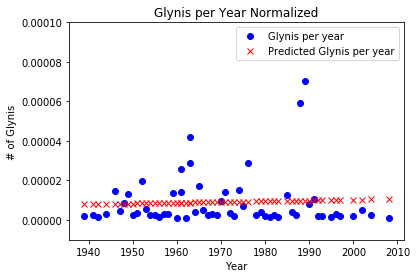

In [107]:
# plot data v prediction from model
plt.plot(X,y,'bo', label='Glynis per year')
plt.plot(X, ypred,'rx', label ='Predicted Glynis per year')
plt.xlabel('Year')
plt.ylabel('# of Glynis')
plt.title('Glynis per Year Normalized')
plt.legend()
plt.ylim(-.00001,0.0001)
plt.show()

### Goal 4: Build a supervised learning model

* hard: improve the fit using a polynomial regression

In [108]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression 

In [109]:
#set degree of polynomial fit
poly = PolynomialFeatures(degree=5)
#perfrom transformation on X data
X_ = poly.fit_transform(X)
X_

array([[1.00000000e+00, 2.00000000e+03, 4.00000000e+06, 8.00000000e+09,
        1.60000000e+13, 3.20000000e+16],
       [1.00000000e+00, 1.93900000e+03, 3.75972100e+06, 7.29009902e+09,
        1.41355020e+13, 2.74087384e+16],
       [1.00000000e+00, 2.00200000e+03, 4.00800400e+06, 8.02402401e+09,
        1.60640961e+13, 3.21603203e+16],
       [1.00000000e+00, 2.00400000e+03, 4.01601600e+06, 8.04809606e+09,
        1.61283845e+13, 3.23212826e+16],
       [1.00000000e+00, 1.97300000e+03, 3.89272900e+06, 7.68035432e+09,
        1.51533391e+13, 2.98975380e+16],
       [1.00000000e+00, 1.96700000e+03, 3.86908900e+06, 7.61049806e+09,
        1.49698497e+13, 2.94456943e+16],
       [1.00000000e+00, 1.96600000e+03, 3.86515600e+06, 7.59889670e+09,
        1.49394309e+13, 2.93709212e+16],
       [1.00000000e+00, 1.97200000e+03, 3.88878400e+06, 7.66868205e+09,
        1.51226410e+13, 2.98218480e+16],
       [1.00000000e+00, 1.95800000e+03, 3.83376400e+06, 7.50650991e+09,
        1.46977464e+13, 

In [110]:
lg = LinearRegression()

# Fit
lg.fit(X_, y)

# Obtain coefficients
lg.coef_
y2 = lg.predict(X_)
y2

array([[ 6.36882488e-06],
       [ 4.21570517e-06],
       [ 5.01232949e-06],
       [ 3.48581926e-06],
       [ 1.18384676e-05],
       [ 1.08620763e-05],
       [ 1.06571754e-05],
       [ 1.17102172e-05],
       [ 8.73958650e-06],
       [ 1.02190315e-05],
       [ 1.14097144e-05],
       [ 1.15670070e-05],
       [ 1.04425399e-05],
       [ 8.99837893e-06],
       [ 9.50384855e-06],
       [ 9.50384855e-06],
       [ 1.20465664e-05],
       [ 6.37979325e-06],
       [ 6.12942115e-06],
       [ 1.19508781e-05],
       [ 9.25341505e-06],
       [ 1.21246471e-05],
       [ 9.74883054e-06],
       [ 1.11298924e-05],
       [ 1.13624523e-05],
       [ 9.98750955e-06],
       [ 9.98750955e-06],
       [ 7.15501982e-06],
       [ 5.64564507e-06],
       [ 1.05730217e-05],
       [ 1.18876863e-05],
       [ 1.08670571e-05],
       [ 5.88443321e-06],
       [ 7.41872114e-06],
       [ 1.22443532e-05],
       [ 6.89341459e-06],
       [ 1.17404313e-05],
       [ 1.02468590e-05],
       [ 9.8

# Goal 4: Build a supervised learning model
    
* hard: improve the fit using a polynomial regression

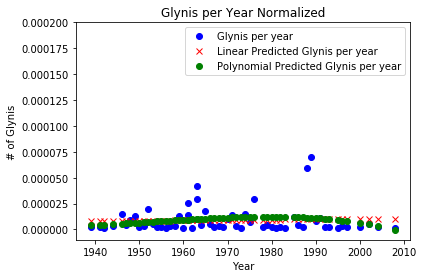

In [112]:
plt.plot(X,y,'bo', label='Glynis per year')
plt.plot(X, ypred,'rx', label ='Linear Predicted Glynis per year')
plt.plot(X, y2,'go', label ='Polynomial Predicted Glynis per year')
plt.xlabel('Year')
plt.ylabel('# of Glynis')
plt.title('Glynis per Year Normalized')
plt.legend()
plt.ylim(-.00001,0.0002)
plt.show()

In [113]:
#set degree of polynomial fit
poly = PolynomialFeatures(degree=3)
#perfrom transformation on X data
X_N2 = poly.fit_transform(X_N)

In [114]:
lg.fit(X_N2, y_N)

# Obtain coefficients
lg.coef_
y_N2 = lg.predict(X_N2)

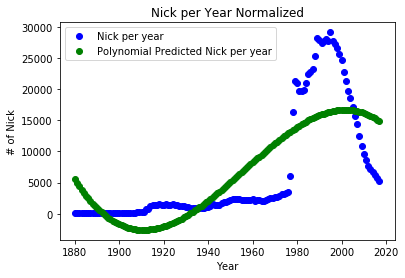

In [115]:
plt.plot(X_N,y_N,'bo', label='Nick per year')
plt.plot(X_N, y_N2,'go', label ='Polynomial Predicted Nick per year')
plt.xlabel('Year')
plt.ylabel('# of Nick')
plt.title('Nick per Year Normalized')
plt.legend()
plt.show()

In [116]:
poly = PolynomialFeatures(degree=10)
#perfrom transformation on X data
X_Pa2 = poly.fit_transform(X_Pa)

In [117]:
lg.fit(X_Pa2, y_Pa)

# Obtain coefficients
lg.coef_
y_Pa2 = lg.predict(X_Pa2)

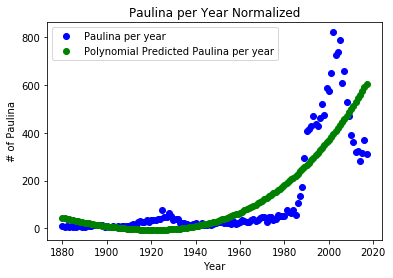

In [118]:
plt.plot(X_Pa,y_Pa,'bo', label='Paulina per year')
plt.plot(X_Pa, y_Pa2,'go', label ='Polynomial Predicted Paulina per year')
plt.xlabel('Year')
plt.ylabel('# of Paulina')
plt.title('Paulina per Year Normalized')
plt.legend()
plt.show()

In [119]:
poly = PolynomialFeatures(degree=5)
#perfrom transformation on X data
X_Ph2 = poly.fit_transform(X_Ph)

In [120]:
lg.fit(X_Ph2, y_Ph)

# Obtain coefficients
lg.coef_
y_Ph2 = lg.predict(X_Ph2)

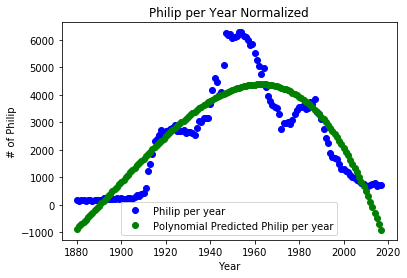

In [121]:
plt.plot(X_Ph,y_Ph,'bo', label='Philip per year')
plt.plot(X_Ph, y_Ph2,'go', label ='Polynomial Predicted Philip per year')
plt.xlabel('Year')
plt.ylabel('# of Philip')
plt.title('Philip per Year Normalized')
plt.legend()
plt.show()